## Match Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [203]:
data = pd.read_csv("deliveries.csv")
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [204]:
data.shape

(179078, 21)

In [205]:
data.drop(["match_id","non_striker","fielder","penalty_runs"],axis = 1, inplace = True )

In [206]:
data

,inning,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,0,0,0,0,2,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SL Malinga,0,0,0,0,0,1,0,1,NaN,NaN
179074,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,SL Malinga,0,0,0,0,0,2,0,2,NaN,NaN
179075,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,SL Malinga,0,0,0,0,0,1,0,1,SR Watson,run out
179076,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,SL Malinga,0,0,0,0,0,2,0,2,NaN,NaN


#### DC VS MI 

In [207]:
fill =data[np.logical_or(np.logical_and(data['batting_team']=='Delhi Capitals',data['bowling_team']=='Mumbai Indians'),
                            np.logical_and(matches['bowling_team']=='Delhi Capitals',matches['batting_team']=='Mumbai Indians'))]

In [228]:
fill

,inning,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
165208,1,Delhi Capitals,Mumbai Indians,1,1,P Shaw,R Salam,0,0,0,0,1,2,1,3,NaN,NaN
165209,1,Delhi Capitals,Mumbai Indians,1,2,S Dhawan,R Salam,0,0,0,0,0,1,0,1,NaN,NaN
165210,1,Delhi Capitals,Mumbai Indians,1,3,P Shaw,R Salam,0,0,0,0,0,1,0,1,NaN,NaN
165211,1,Delhi Capitals,Mumbai Indians,1,4,S Dhawan,R Salam,0,0,0,0,0,0,0,0,NaN,NaN
165212,1,Delhi Capitals,Mumbai Indians,1,5,S Dhawan,R Salam,0,0,0,0,0,1,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,2,Delhi Capitals,Mumbai Indians,20,2,K Rabada,HH Pandya,0,0,0,0,0,6,0,6,NaN,NaN
173001,2,Delhi Capitals,Mumbai Indians,20,3,K Rabada,HH Pandya,0,0,0,0,0,0,0,0,NaN,NaN
173002,2,Delhi Capitals,Mumbai Indians,20,4,K Rabada,HH Pandya,0,0,0,0,0,0,0,0,K Rabada,caught
173003,2,Delhi Capitals,Mumbai Indians,20,5,A Mishra,HH Pandya,0,0,0,0,0,2,0,2,NaN,NaN


### Rohit Sharma Performance Analysis

In [209]:
#innings by runs scored in 2019

fill.groupby(["inning","batsman"])["batsman_runs"].sum()

inning  batsman       
1       AR Patel           4
        AS Yadav          26
        BCJ Cutting        2
        C Ingram          47
        HH Pandya         32
        K Paul             5
        KH Pandya         41
        P Shaw             8
        Q de Kock         36
        R Tewatia          9
        RG Sharma         31
        RR Pant           80
        S Dhawan          44
        SS Iyer           16
2       A Mishra          11
        AR Patel          27
        AS Yadav           2
        BCJ Cutting        3
        C Munro            4
        CH Morris         11
        HH Pandya          0
        K Rabada          10
        KA Pollard        21
        KH Pandya         33
        MJ McClenaghan    10
        P Shaw            20
        Q de Kock         29
        R Salam            5
        RG Sharma         14
        RR Pant            7
        S Dhawan          35
        SS Iyer            3
        Yuvraj Singh      59
Name: batsman_runs, 

In [210]:
#total runs scored by Rohit against Delhi Capitals

for value in fill.groupby("batsman"):
    if value[0] == "RG Sharma":
        print(value[1]['batsman_runs'].sum())

45


In [211]:
batsman_name = 'RG Sharma'
def batsmen_out_stats(batsman_name):
    for value in fill.groupby(['player_dismissed']):
        if value[0] == batsman_name :
            return value[1]['dismissal_kind'].value_counts()

stats = batsmen_out_stats(batsman_name)
stats = stats.to_frame().reset_index().rename(columns = {'index' : 'Dismissal Kind' , 'dismissal_kind' : 'Count'})
stats

,Dismissal Kind,Count
0,bowled,1
1,caught,1


#### K Rabada Performance Analysis

In [212]:
fill.groupby(["inning","player_dismissed"])["bowler"].sum()

inning  player_dismissed
1       AR Patel                 JJ Bumrah
        AS Yadav                  K Rabada
        BCJ Cutting               AR Patel
        C Ingram               BCJ Cutting
        HH Pandya                 K Rabada
        K Paul              MJ McClenaghan
        P Shaw              MJ McClenaghan
        Q de Kock                 AR Patel
        RG Sharma                 A Mishra
        S Dhawan                 HH Pandya
        SS Iyer             MJ McClenaghan
2       AR Patel                 JJ Bumrah
        AS Yadav                  I Sharma
        BCJ Cutting               K Rabada
        C Munro                  KH Pandya
        CH Morris               SL Malinga
        HH Pandya                 AR Patel
        JJ Bumrah                R Tewatia
        K Paul                   JJ Bumrah
        K Rabada                 HH Pandya
        KA Pollard                  K Paul
        KH Pandya                 TA Boult
        P Shaw               

In [213]:
bowler_name = 'K Rabada'
def bowler_dismissal_stats(bowler_name):
    for value in fill.groupby('bowler'):
        if value[0] == bowler_name:
            return value[1]['dismissal_kind'].value_counts()
stats = bowler_dismissal_stats(bowler_name)
stats = stats.to_frame().reset_index().rename(columns = {'index' : 'Dismissal Kind' , 'dismissal_kind' : 'Count'})
stats

,Dismissal Kind,Count
0,caught,4


In [225]:
if 'run out' in stats['Dismissal Kind'].values:
    x = stats[(stats['Dismissal Kind'] == 'run out')].Count.values[0]
else:
    x = 0

print("Number of Wickets taken by " + str(bowler_name) + ' =>', stats['Count'].sum() - x)

Number of Wickets taken by K Rabada => 4


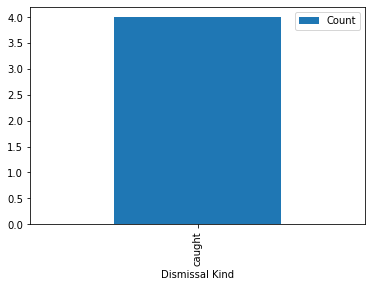

In [215]:
stats.plot(kind = 'bar' , x = 'Dismissal Kind' , y = 'Count')

####  Wides balled

In [216]:
filled= fill.where(fill["wide_runs"] >0)

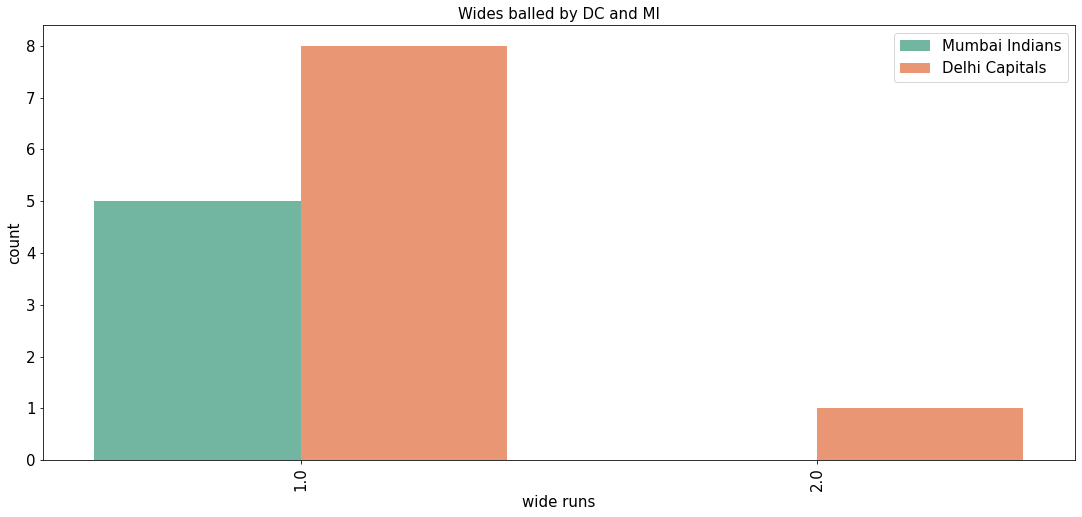

In [218]:
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(filled['wide_runs'],palette='Set2',hue=fill['bowling_team'])
plt.title('Wides balled by DC and MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('wide runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

From the above analysis we can predict that Rohit Sharma performs slightly better batting first but his form against Delhi Captails is not that impressive . So, we can predict his early dismissal.

In case of K Rababda we see that we has taken wickets in both the matches so he is considered to be continuing his good recent form today also and is expected to take atleast 2 wickets.

From the above analysis we can see that Delhi Capitals bowl more wide balls then Mumbai Indians

For all these analysis we have considered only the recent year performance of the players , so sample size is quite small.